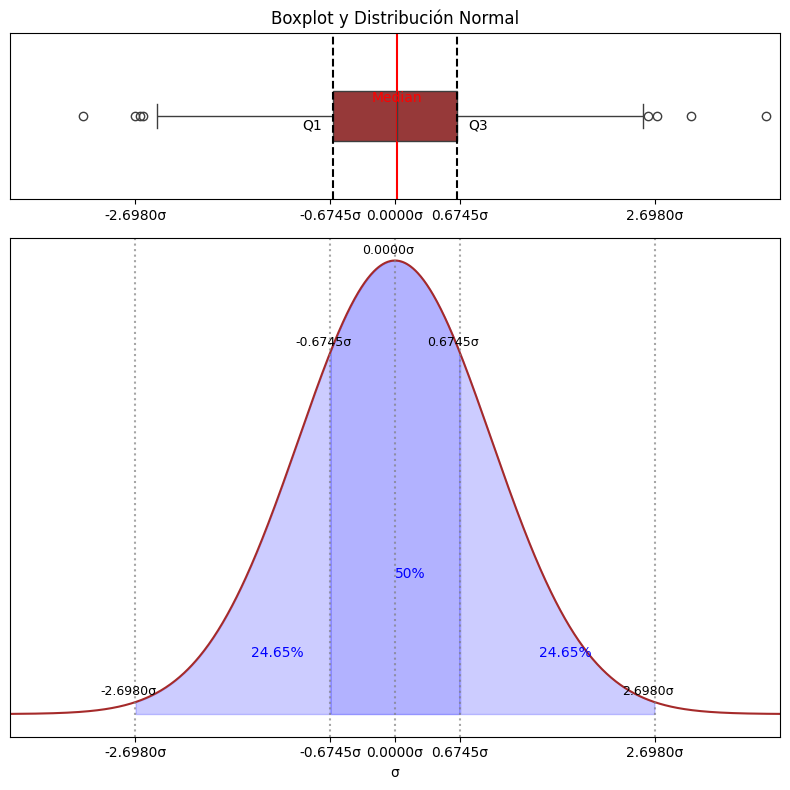

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Datos simulados con distribución normal
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

# Calcular cuartiles y límites de IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median = np.median(data)

# Valores correspondientes a los cuartiles en términos de sigma
sigma_vals = [-2.698, -0.6745, 0, 0.6745, 2.698]

# Crear figura y ejes
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [1, 3]})

# Boxplot alineado con la distribución normal
sns.boxplot(x=data, ax=ax[0], color="brown", width=0.3)
ax[0].set_xticks(sigma_vals)
ax[0].set_xticklabels([f"{val:.4f}σ" for val in sigma_vals])
ax[0].axvline(Q1, color='black', linestyle='--')
ax[0].axvline(Q3, color='black', linestyle='--')
ax[0].axvline(median, color='red', linestyle='-')
ax[0].set_title("Boxplot y Distribución Normal", fontsize=12)
ax[0].annotate("Q1", (Q1, 0), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=10)
ax[0].annotate("Q3", (Q3, 0), textcoords="offset points", xytext=(15,-10), ha='center', fontsize=10)
ax[0].annotate("Median", (median, 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')
ax[0].set_xlim(-4, 4)
ax[0].set_yticks([])

# Distribución normal
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)
ax[1].plot(x, y, color='brown')
ax[1].fill_between(x, y, where=(x>=-0.6745) & (x<=0.6745), color='blue', alpha=0.3)
ax[1].fill_between(x, y, where=(x<=-0.6745) & (x>=-2.698), color='blue', alpha=0.2)
ax[1].fill_between(x, y, where=(x>=0.6745) & (x<=2.698), color='blue', alpha=0.2)

# Líneas y etiquetas
for sigma in sigma_vals:
    ax[1].axvline(sigma, color='gray', linestyle='dotted', alpha=0.7)
    ax[1].annotate(f"{sigma:.4f}σ", (sigma, norm.pdf(sigma)), textcoords="offset points", xytext=(-5,5), fontsize=9, ha='center')

# Etiquetas de probabilidades
ax[1].annotate("24.65%", (-1.5, 0.05), fontsize=10, color='blue')
ax[1].annotate("50%", (0, 0.12), fontsize=10, color='blue')
ax[1].annotate("24.65%", (1.5, 0.05), fontsize=10, color='blue')

ax[1].set_xlim(-4, 4)
ax[1].set_xticks(sigma_vals)
ax[1].set_xticklabels([f"{val:.4f}σ" for val in sigma_vals])
ax[1].set_yticks([])
ax[1].set_xlabel("σ")
plt.tight_layout()
plt.show()


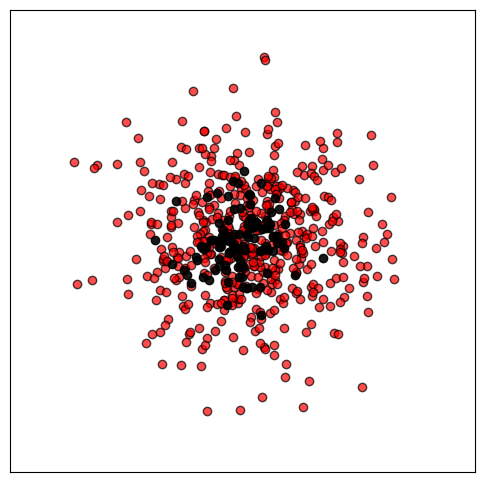

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para la nube de puntos inferior (roja)
x1 = np.random.normal(loc=0, scale=1, size=500)
y1 = np.random.normal(loc=0, scale=1, size=500)

# Generar datos para la nube de puntos superior (negra)
x2 = np.random.normal(loc=0, scale=0.5, size=100)
y2 = np.random.normal(loc=0, scale=0.5, size=100)

# Crear la figura
fig, ax = plt.subplots(figsize=(6,6))

# Graficar los puntos
ax.scatter(x1, y1, color='red', edgecolors='black', alpha=0.7)
ax.scatter(x2, y2, color='black', edgecolors='black', alpha=0.9)

# Configuración de ejes
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

plt.show()


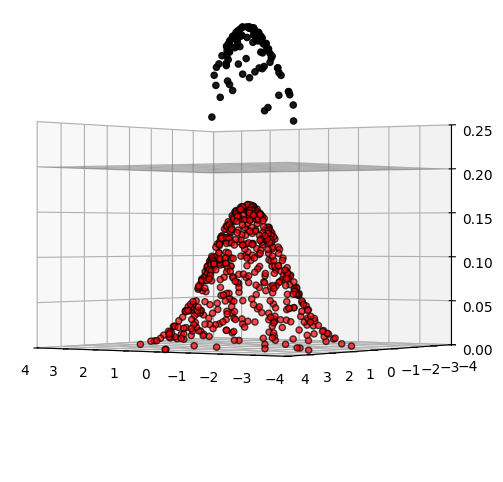

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos para la nube de puntos inferior (roja)
#x1 = np.random.normal(loc=0, scale=1, size=500)
#y1 = np.random.normal(loc=0, scale=1, size=500)
z1 = np.exp(-0.5 * (x1**2 + y1**2)) / (2 * np.pi)

# Generar datos para la nube de puntos superior (negra)
#x2 = np.random.normal(loc=0, scale=0.5, size=100)
#y2 = np.random.normal(loc=0, scale=0.5, size=100)
z2 = np.exp(-0.5 * (x2**2 + y2**2)) / (2 * np.pi) + 0.2  # Elevado

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(x1, y1, z1, color='red', edgecolors='black', alpha=0.7)
ax.scatter(x2, y2, z2, color='black', edgecolors='black', alpha=0.9)

# Crear un hiperplano para dividir los grupos
grid_x = np.linspace(-4, 4, 10)
grid_y = np.linspace(-4, 4, 10)
X, Y = np.meshgrid(grid_x, grid_y)
Z = np.full(X.shape, 0.20)  # Ajustar la posición del hiperplano en Z = 0.13
ax.plot_surface(X, Y, Z, color='gray', alpha=0.5)

# Configuración de ejes y ángulo de vista para coincidir con la imagen proporcionada
ax.view_init(elev=0, azim=125)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 0.25)
ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 5, 1))
ax.set_zticks(np.linspace(0, 0.25, 6))

plt.show()
